<a href="https://colab.research.google.com/github/aasthanarang6/object_detection_using_yolov5/blob/main/loanpricepredictionaastha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/loan_approval_dataset.csv")

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.drop(['loan_id'], axis=1, inplace=True)

In [ ]:
data.nunique()

,0
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188
luxury_assets_value,379


In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data[" education"] = LabelEncoder.fit_transform(data[" education"])
data[" self_employed"] = LabelEncoder.fit_transform(data[" self_employed"])
data[" loan_status"] = LabelEncoder.fit_transform(data[" loan_status"])

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


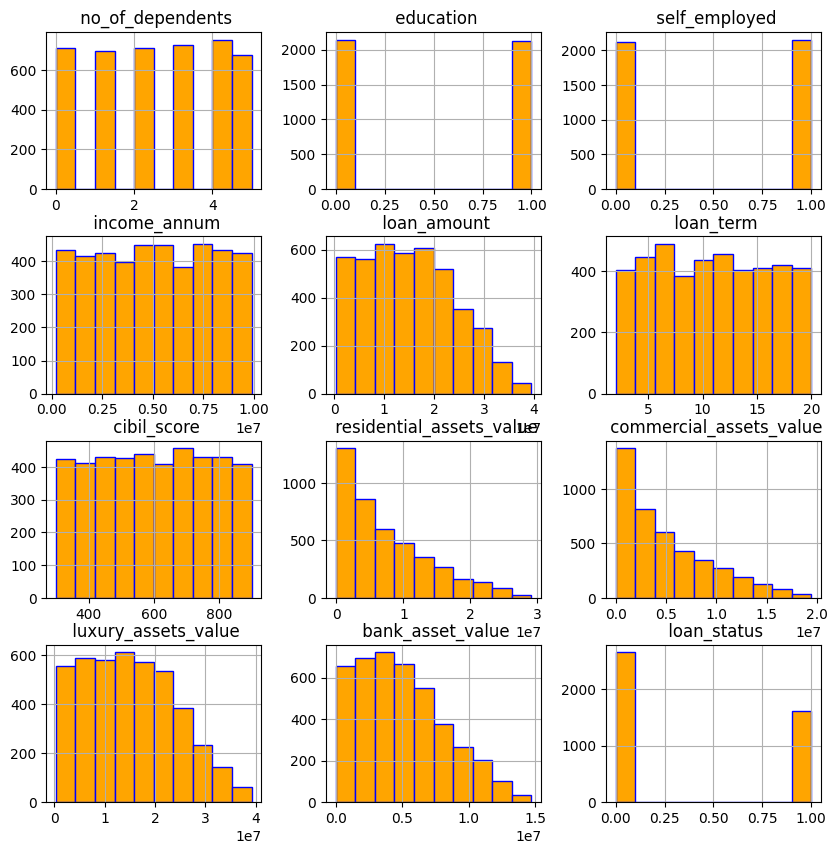

In [ ]:
import matplotlib.pyplot as plt

data.hist(figsize=(10,10), color='orange', edgecolor='blue')
plt.show()

In [ ]:
x=data.drop([" loan_status"], axis=1)
y=data[" loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()


lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7295081967213115


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# prompt: predict output using trained model clf on user input values. given attributes are Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
#        ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
#        ' residential_assets_value', ' commercial_assets_value',
#        ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
#       dtype='object') where loan_status is output

# Assuming 'clf' is your trained LogisticRegression model (lr in your code)
# You'll need to provide the input values as a list or a NumPy array
# in the same order as the features used to train the model.

# Example input values:
user_input = [2, 0, 0, 500000, 500, 36, 700, 100000, 200000, 100000, 200000]

# Make the prediction using your trained model
prediction = lr.predict([user_input])

# The prediction will be either 0 or 1, representing the predicted loan status
# (assuming you encoded loan_status as 0 and 1).
print(f"Predicted Loan Status: {prediction[0]}")

# To get the probability of each class, you can use predict_proba:
probabilities = lr.predict_proba([user_input])
print(f"Probabilities: {probabilities}")


Predicted Loan Status: 0
Probabilities: [[0.92515188 0.07484812]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
